In [1]:
%cd ..

/home/sandor/dtu/2021-22-spring/advanced_machine_learning/p-reg


   Unnamed: 0  seed  hidden_channels  mu  train_acc  val_acc  test_acc  \
0           0     0                1   0     0.4429    0.342     0.335   
1           1     0                1   2     0.1429    0.122     0.130   
2           2     0                1   4     0.1429    0.114     0.103   
3           3     0                1   6     0.1429    0.114     0.103   
4           4     0                1   8     0.1429    0.114     0.103   

     icd0      icd1          icd2      icd3  \
0  0.5699  0.252966  1.923538e-06  0.364966   
1  1.1702  2.141059  5.338325e-07  1.017062   
2  0.7865  2.923626  5.004470e-07  1.247306   
3  0.6404  3.327813  4.109456e-06  1.305374   
4  0.5224  3.762182  2.534175e-05  1.383783   

                                            icd4  
0   [0.00026382032, 0.00011926885, 9.506412e-06]  
1  [9.4533876e-05, 1.7476323e-05, 4.1389335e-06]  
2   [8.9040455e-05, 1.556986e-05, 3.0583838e-06]  
3  [0.00017121165, 4.2848722e-05, 4.6759533e-06]  
4  [0.00031044259

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


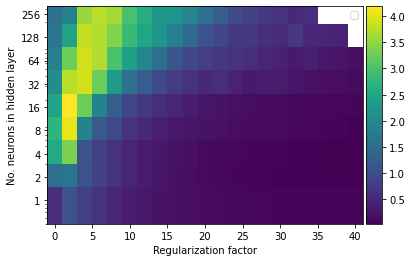

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

def add_colorbar(im, fig, ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')


df = pd.read_csv('reports/figures/acc_on_mu_and_neurons.csv')
df['icd0'] = df['icd0'].apply(lambda l: float(l.split('(')[-1].split(')')[0]))
print(df.head())
# ridiculously slow implementation, but I don't want to figure this out now
arr = np.zeros((df['hidden_channels'].unique().shape[0], df['mu'].unique().shape[0]))
for ind_i, i in enumerate(df['hidden_channels'].unique()):
    for ind_j, j in enumerate(df['mu'].unique()):
        # print((df['hidden_channels'] == i) & (df['mu'] == j))
        # print(df[(df['hidden_channels'] == i) & (df['mu'] == j)]['test_acc'])
        arr[ind_i,ind_j] = df[(df['hidden_channels'] == i) & (df['mu'] == j)]['icd0'].mean()
# plt.pcolormesh()



fig, ax = plt.subplots()
im = ax.pcolormesh(list(map(lambda l: 2*l, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])), [1, 2, 4, 8, 16, 32, 64, 128, 256], arr, )
ax.set_yscale('log')
ax.set_yticks([1, 2, 4, 8, 16, 32, 64, 128, 256])
ax.set_yticklabels([1, 2, 4, 8, 16, 32, 64, 128, 256])
add_colorbar(im, fig, ax)
ax.set(xlabel='Regularization factor', ylabel='No. neurons in hidden layer')
ax.legend()
plt.show()
